В этом ноутбуке сделаем следующее:
Попытаемся находить подходящий размер значка, чтобы находить его с помощью функции matching template.
Попробую применить такой подход:
1. Имею значок, изображение определенного размера и соответствующую маску.
2. Генерирую несколько дополнительных размеров этого значка и смотрю, на какой из размеров я получаю лучшие отклики в виде максимального значения ответного массива.
3.

In [1]:
import cv2 as cv
import numpy as np
import math
from matplotlib import pyplot as plt

In [158]:
import os
import pandas as pd
import configparser
import shutil


config = configparser.ConfigParser()

config.read('config.ini')



['config.ini']

In [151]:
print(config["folders"]["sign_sources"])

01_signs_row


In [147]:
try:
    config.add_section('folders')
except:
    pass
config.set("folders", 'sign_sources', value = '01_signs_row')
config.set("folders", 'sign_ready', value = '03_sings_ready')
config.set("folders", 'plan_sources', value = '02_plan_row')
config.set("folders", 'plan_read', value = '04_plan_ready')

with open('config.ini', 'w') as f:
    config.write(f)

In [2]:
img_rgb = cv.imread(r"D:\07_Progs\match_templ\Plan2.jpg")
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread(r'D:\07_Progs\match_templ\sound.png',0)
mask = cv.imread(r'D:\07_Progs\match_templ\mask_snd.png',0)
w, h = template.shape[::-1]



Принимаем файлы, которые необходимо обработать:

In [89]:
test_files = []
print(os.path.abspath(os.curdir))
print(os.listdir(test_path))
for i in os.listdir(test_path):     
    if os.path.isfile(os.path.join(test_path, i)):
        test_files.append(os.path.join(test_path,i))
for i in test_files:
    print(i)
        

d:\07_Progs\match_templ
['01 (1).jpg', '01 (2).jpg', '01 (3).jpg', '01 (4).jpg', '01 (5).jpg', '01 (6).jpg', '01 (7).jpg', '01 (8).jpg', '01 (9).jpg']
.\tests\01 (1).jpg
.\tests\01 (2).jpg
.\tests\01 (3).jpg
.\tests\01 (4).jpg
.\tests\01 (5).jpg
.\tests\01 (6).jpg
.\tests\01 (7).jpg
.\tests\01 (8).jpg
.\tests\01 (9).jpg


Формируем массив со значками разного размера


In [95]:
threshold = 0.7

loc = np.where(res >= .6)

print(f'Начальный размер знака {template.shape:}')

tmpl = []
msk = []
for i in range(-9,30,1):
    fx = 1 + i / 20 + 0.06
    fy = 1 + i / 20 + 0.06
    tmpl.append (
        cv.resize(
            template, (0,0), fx = fx, fy = fy))
    msk.append (
        cv.resize(
            mask, (0,0), fx = fx, fy = fy))

for i in range(len(tmpl)):    
    res = cv.matchTemplate(img_gray,tmpl[i],cv.TM_CCOEFF_NORMED, msk[i])
    print(res.max())
    print(tmpl[i].shape)



Начальный размер знака (57, 34)
0.5390824
(35, 21)
0.61009115
(38, 22)
0.55284256
(40, 24)
0.55165994
(43, 26)
0.5378484
(46, 28)
0.60472584
(49, 29)
0.67947423
(52, 31)
0.8717198
(55, 33)
0.9617022
(58, 34)
0.77302355
(60, 36)
0.58416396
(63, 38)
0.54114336
(66, 39)
0.524843
(69, 41)
0.50997597
(72, 43)
0.50886124
(75, 45)
0.47868696
(78, 46)
0.44866547
(80, 48)
0.46347094
(83, 50)
0.44960794
(86, 51)
0.4554776
(89, 53)
0.45895824
(92, 55)
0.471038
(95, 56)
0.4618164
(97, 58)
0.47242272
(100, 60)
0.51097536
(103, 62)
0.5276464
(106, 63)
0.53570515
(109, 65)
0.515509
(112, 67)
0.48968628
(115, 68)
0.47846767
(117, 70)
0.5003607
(120, 72)
0.51106465
(123, 73)
0.5054828
(126, 75)
0.50667787
(129, 77)
0.4920961
(132, 79)
0.47098142
(135, 80)
0.46562353
(137, 82)
0.46349284
(140, 84)
0.46085098
(143, 85)


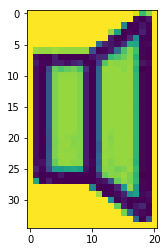

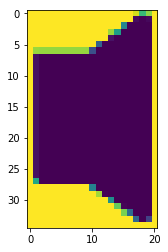

(35, 21) (35, 21)


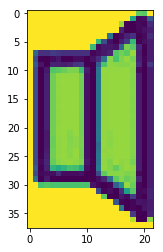

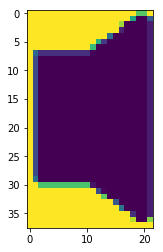

(38, 22) (38, 22)


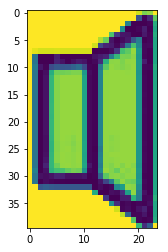

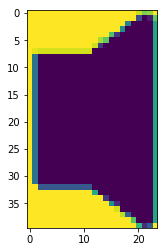

(40, 24) (40, 24)


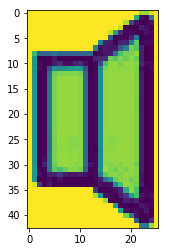

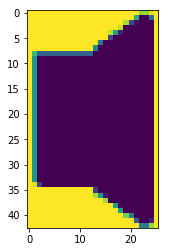

(43, 26) (43, 26)


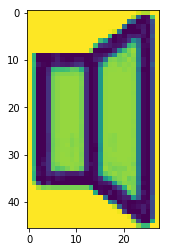

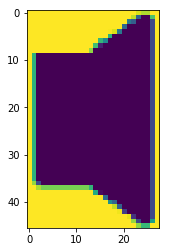

(46, 28) (46, 28)


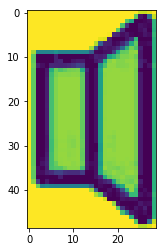

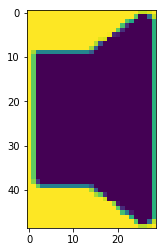

(49, 29) (49, 29)


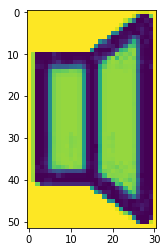

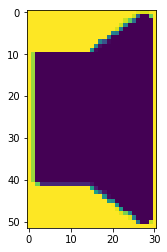

(52, 31) (52, 31)


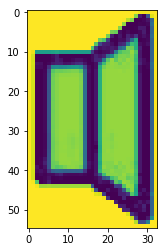

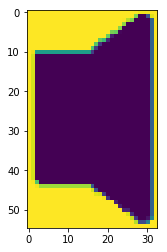

(55, 33) (55, 33)


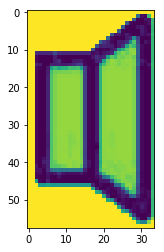

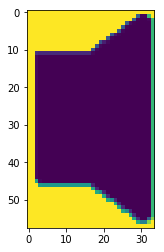

(58, 34) (58, 34)


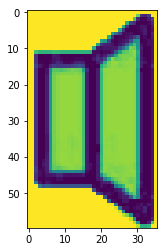

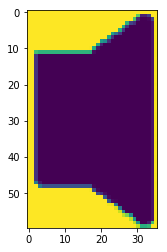

(60, 36) (60, 36)


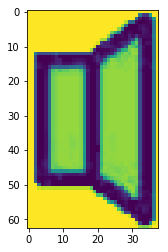

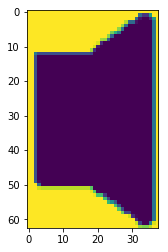

(63, 38) (63, 38)


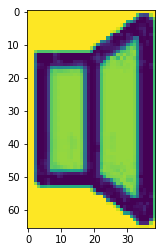

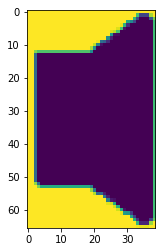

(66, 39) (66, 39)


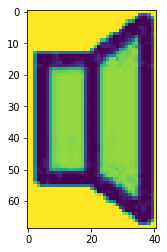

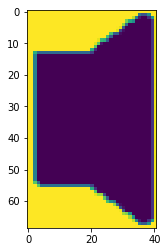

(69, 41) (69, 41)


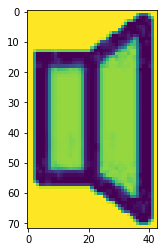

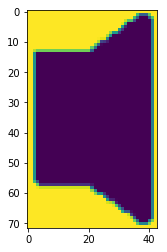

(72, 43) (72, 43)


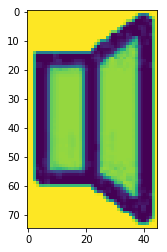

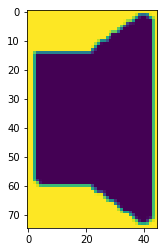

(75, 45) (75, 45)


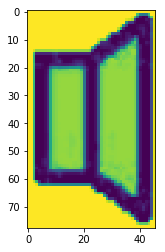

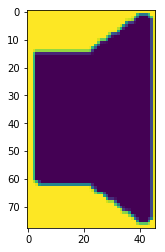

(78, 46) (78, 46)


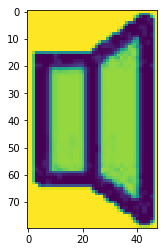

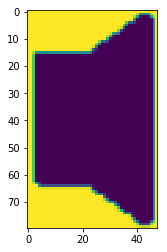

(80, 48) (80, 48)


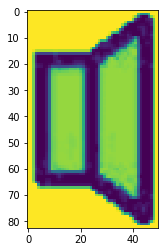

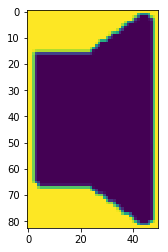

(83, 50) (83, 50)


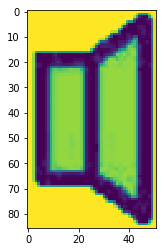

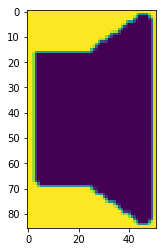

(86, 51) (86, 51)


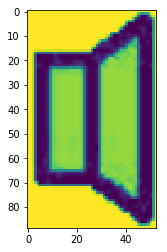

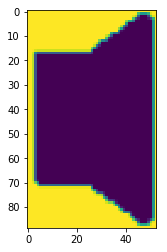

(89, 53) (89, 53)


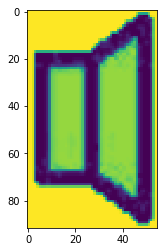

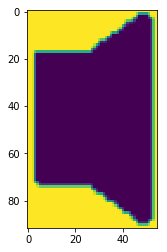

(92, 55) (92, 55)


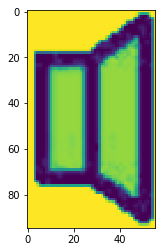

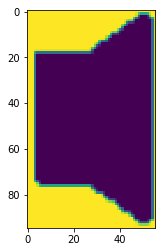

(95, 56) (95, 56)


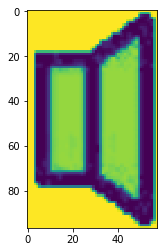

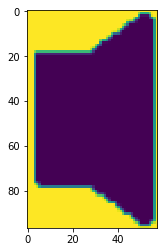

(97, 58) (97, 58)


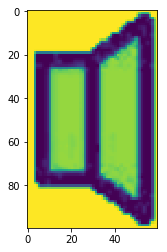

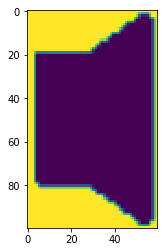

(100, 60) (100, 60)


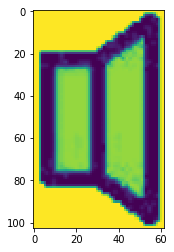

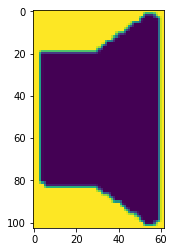

(103, 62) (103, 62)


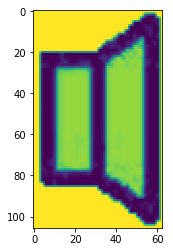

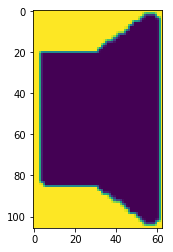

(106, 63) (106, 63)


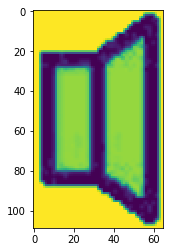

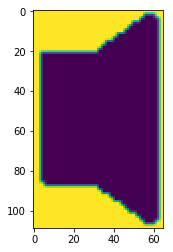

(109, 65) (109, 65)


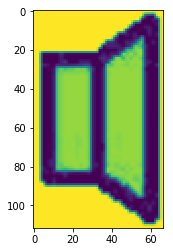

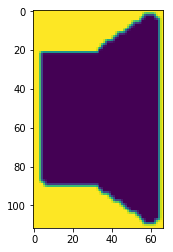

(112, 67) (112, 67)


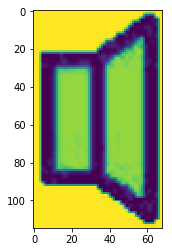

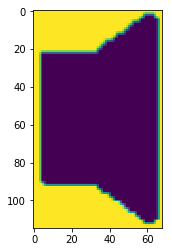

(115, 68) (115, 68)


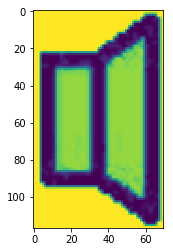

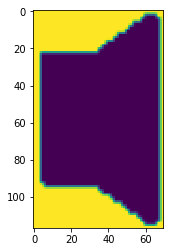

(117, 70) (117, 70)


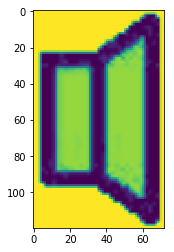

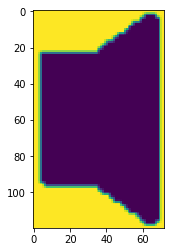

(120, 72) (120, 72)


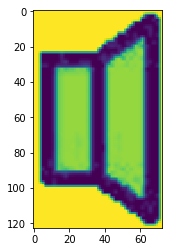

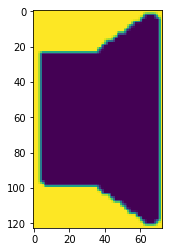

(123, 73) (123, 73)


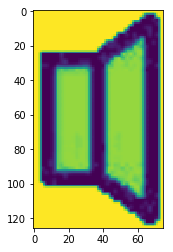

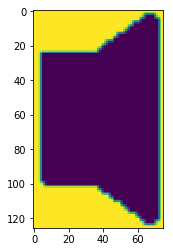

(126, 75) (126, 75)


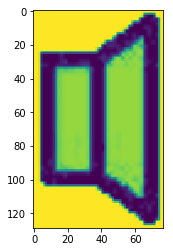

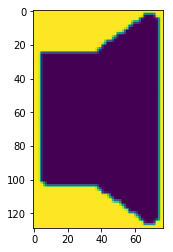

(129, 77) (129, 77)


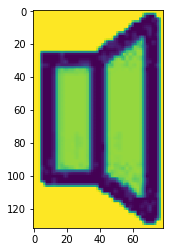

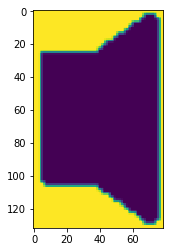

(132, 79) (132, 79)


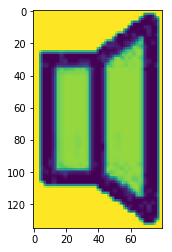

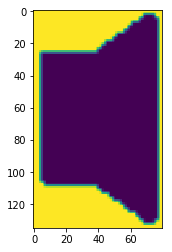

(135, 80) (135, 80)


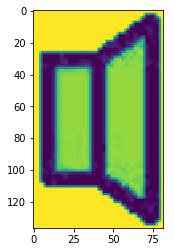

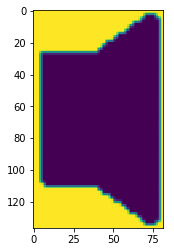

(137, 82) (137, 82)


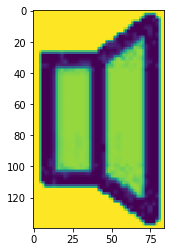

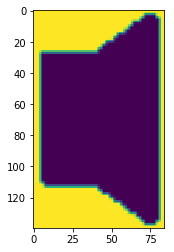

(140, 84) (140, 84)


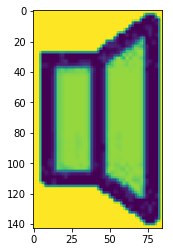

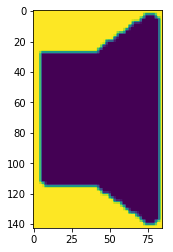

(143, 85) (143, 85)


In [97]:
for i in range(len(tmpl)):
    plt.imshow(tmpl[i])
    plt.show()
    plt.imshow(msk[i])
    plt.show()
    print(tmpl[i].shape, msk[i].shape)

In [94]:
print(template.shape, mask.shape)

(57, 34) (57, 34)


In [46]:
for i in range(4):   
    for pt in zip(*loc[i][::-1]):
        cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,0), 2)


In [38]:
pts = []
for i in range(4)
    pts.append(list(zip(*loc[::-1])))
print(len(pts))

37


In [39]:
pts = list(zip(*loc[::-1]))
i = 0
while i < len(pts):
    i1 = i + 1
    while i1 < len(pts) :
        if (abs(pts[i1][0]-pts[i][0])<=w) and (abs(pts[i1][1]-pts[i][1])<=h):
            del(pts[i1])
        else :       
            i1+=1
    i+=1
    
print(len(pts))   
            

5


In [114]:
threshold = 0.7

loc = np.where(res >= .6)

ind = pd.Index(test_files)

df = pd.DataFrame(index=ind, columns=list(range(len(tmpl))))


print(f'Начальный размер знака {template.shape:}')

for i in test_files:
    print(i)
    img_rgb = cv.imread(i)
    img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)    
    for i1 in range(len(tmpl)):
        res = cv.matchTemplate(img_gray,tmpl[i1],cv.TM_CCOEFF_NORMED, msk[i1])
        df.loc[i][i1] = res.max()
        print(i1, end = " ")
        
    

# for i in range(len(tmpl)):    
#     res = cv.matchTemplate(img_gray,tmpl[i],cv.TM_CCOEFF_NORMED, msk[i])
#     print(res.max())
#     print(tmpl[i].shape)

df


Начальный размер знака (57, 34)
.\tests\01 (1).jpg
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 .\tests\01 (2).jpg
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 .\tests\01 (3).jpg
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 .\tests\01 (4).jpg
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 .\tests\01 (5).jpg
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 .\tests\01 (6).jpg
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 .\tests\01 (7).jpg
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 .\tests\01 (8).jpg
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
.\tests\01 (1).jpg,0.595174,0.63621,0.562061,0.554429,0.53399,0.605283,0.705624,0.891215,0.96009,0.78538,...,0.478532,0.511793,0.521372,0.514274,0.511547,0.489045,0.470451,0.466032,0.466389,0.463401
.\tests\01 (2).jpg,0.595174,0.63621,0.562061,0.554429,0.53399,0.605283,0.705624,0.891215,0.96009,0.78538,...,0.478532,0.511793,0.521372,0.514274,0.511547,0.489045,0.470451,0.466032,0.466389,0.463401
.\tests\01 (3).jpg,0.654465,0.63621,0.551965,0.554429,0.53399,0.605283,0.710412,0.893534,0.960474,0.805382,...,0.478532,0.511793,0.521372,0.514274,0.511547,0.489045,0.47045,0.466032,0.466389,0.463401
.\tests\01 (4).jpg,0.577645,0.641768,0.576596,0.554701,0.541886,0.606477,0.706485,0.893221,0.959633,0.798777,...,0.478532,0.511794,0.521371,0.514275,0.511547,0.489044,0.47045,0.466032,0.466389,0.4634
.\tests\01 (5).jpg,0.632654,0.610091,0.552843,0.55166,0.537848,0.604726,0.690727,0.873167,0.930034,0.808469,...,0.478468,0.500361,0.511065,0.505483,0.506678,0.492096,0.470981,0.465624,0.463493,0.460851
.\tests\01 (6).jpg,0.547149,0.610091,0.553415,0.55166,0.537848,0.604726,0.695543,0.880092,0.958888,0.767666,...,0.478468,0.500361,0.511065,0.505483,0.506678,0.492096,0.470981,0.465624,0.463493,0.460851
.\tests\01 (7).jpg,0.549435,0.610091,0.552843,0.55166,0.537848,0.604726,0.707691,0.892229,0.958555,0.774933,...,0.478468,0.500361,0.511065,0.505483,0.506678,0.492096,0.470981,0.465624,0.463493,0.460851
.\tests\01 (8).jpg,0.618377,0.611896,0.589352,0.565765,0.540685,0.604726,0.711746,0.893574,0.951333,0.73366,...,0.478468,0.500361,0.511065,0.505483,0.506678,0.492096,0.470981,0.465624,0.463493,0.460851
.\tests\01 (9).jpg,0.539082,0.610091,0.552843,0.55166,0.537848,0.604726,0.679474,0.87172,0.961702,0.773024,...,0.478468,0.500361,0.511065,0.505483,0.506678,0.492096,0.470981,0.465624,0.463493,0.460851


In [135]:
s = df.loc[df.index[0]]

i_max = s.values.argmax()
print(i_max)
print(s.index[i_max])

for i in df.index:
    print(i)
    print(df.loc[i].values.argmax())





8
8
.\tests\01 (1).jpg
8
.\tests\01 (2).jpg
8
.\tests\01 (3).jpg
8
.\tests\01 (4).jpg
8
.\tests\01 (5).jpg
8
.\tests\01 (6).jpg
8
.\tests\01 (7).jpg
8
.\tests\01 (8).jpg
8
.\tests\01 (9).jpg
8


In [37]:
print (pts)

[(4476, 1148), (4917, 1175), (5182, 1175), (3356, 1181), (3730, 1181), (4104, 1181), (4599, 1323), (4760, 1365), (3173, 1374), (3356, 1447), (3730, 1448), (4104, 1448), (4599, 1485), (4917, 1491), (5183, 1491), (4760, 1526), (3033, 1552), (3450, 1723), (2833, 1753), (4917, 1806), (5183, 1806), (3114, 1871), (3450, 1989), (2751, 2005), (4917, 2122), (5183, 2122), (3441, 2251), (2711, 2268), (3085, 2268), (4917, 2438), (5183, 2438), (3441, 2497), (2711, 2535), (3085, 2535), (4917, 2753), (5183, 2753), (2711, 2801), (3085, 2801), (3459, 2801), (3833, 2801), (4207, 2801), (4581, 2801), (4782, 2872), (2282, 2890), (2120, 2916), (2282, 3001), (2710, 3067), (3084, 3067), (3458, 3067), (3833, 3067), (4207, 3067), (4581, 3067), (4781, 3067), (4917, 3069), (5183, 3069), (2046, 3072), (2418, 3132)]


In [47]:
cv.imwrite('res.png',img_rgb)

True

Алгоритм подсчета такой:
    1. Загружаем массив с именами файлов, которые необходимо проанализировать
    2. Загружаем массив со знаками, которые мы ищем.
    3. Вызываем функцию для 

In [159]:
def clear_fold(path):
    for i in os.listdir(path):
        if os.path.isfile(os.path.join(path, i)):
            os.remove(os.path.join(path, i))

In [157]:
# Читаем изображения в папке
config = configparser.ConfigParser()
config.read("config.ini")

for i in config['folders']:
    print(i)

s_folder = os.path.join(os.curdir, config['folders']['sign_sources'])
dest_folder = os.path.join(os.curdir, config['folder']['sign_ready'])

print(dest_folder)


f_list = os.listdir(s_folder)

for i in f_list:
    print(i)

sign_sources
sign_ready
plan_sources
plan_read


KeyError: 'folder'